<a href="https://colab.research.google.com/github/nbPittigiani/Ev_Analytics/blob/main/Eletric_Vehicle_Analytics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados (EDA) - Veículos Elétricos**


---

## **1. Introdução**

Este é um conjunto de dados sobre veículos elétricos que abrange dados técnicos, financeiros e de utilização. As colunas incluem informações como:

| Coluna | Descrição |
| :--- | :--- |
| **`Vehicle_ID`** | Identificador único para cada veículo no conjunto de dados. |
| **`Make`** | Fabricante ou marca do veículo (ex: Tesla, Nissan, BMW). |
| **`Model`** | Modelo específico do veículo (ex: Model 3, Leaf, i3). |
| **`Year`** | Ano de fabricação do veículo. |
| **`Region`** | Região geográfica onde o veículo está registrado ou em uso. |
| **`Vehicle_Type`** | Categoria do veículo (ex: Sedan, SUV, Hatchback). |

---
**Especificações Técnicas**

| Coluna | Descrição |
| :--- | :--- |
| **`Battery_Capacity_kWh`** | Capacidade total da bateria em kilowatt-hora (kWh). |
| **`Battery_Health_%`** | Percentual da saúde/capacidade restante da bateria. |
| **`Range_km`** | Autonomia máxima estimada com uma carga completa, em quilômetros. |
| **`Charging_Power_kW`** | Potência máxima de carregamento suportada pelo veículo, em kilowatts (kW). |
| **`Charging_Time_hr`** | Tempo médio para uma recarga completa, em horas. |
| **`Energy_Consumption_kWh_per_100km`** | Consumo médio de energia (kWh) para percorrer 100 km. |

---
**Desempenho**

| Coluna | Descrição |
| :--- | :--- |
| **`Mileage_km`** | Quilometragem total já percorrida pelo veículo. |
| **`Avg_Speed_kmh`** | Velocidade média registrada durante o uso, em km/h. |
| **`Max_Speed_kmh`** | Velocidade máxima que o veículo pode atingir, em km/h. |
| **`Acceleration_0_100_kmh_sec`** | Tempo em segundos para o veículo acelerar de 0 a 100 km/h. |
| **`Temperature_C`** | Temperatura operacional (ambiente ou da bateria), em graus Celsius. |
| **`Charge_Cycles`** | Número de ciclos completos de carga/descarga que a bateria já sofreu. |
| **`Usage_Type`** | Padrão de uso principal do veículo (ex: Urbano, Rodoviário, Misto). |

---
**Custo e Economia**

| Coluna | Descrição |
| :--- | :--- |
| **`Maintenance_Cost_USD`** | Custo anual estimado de manutenção, em dólares. |
| **`Insurance_Cost_USD`** | Custo anual do seguro do veículo, em dólares. |
| **`Electricity_Cost_USD_per_kWh`** | Custo local da eletricidade por kWh, em dólares. |
| **`Monthly_Charging_Cost_USD`** | Custo mensal estimado com recargas, em dólares. |
| **`Resale_Value_USD`** | Valor de revenda estimado do veículo, em dólares. |
| **`CO2_Saved_tons`** | Estimativa de toneladas de CO₂ não emitidas ao usar este VE. |

---

**Fonte dos Dados:**
  * Kaggle
  * https://www.kaggle.com/datasets/khushikyad001/electric-vehicle-analytics-dataset

## **2. Objetivos**


Neste notebook, nosso foco inicial é conduzir uma **Análise Exploratória de Dados (EDA)** detalhada sobre o dataset de Veículos Elétricos. Esta análise é fundamental para compreendermos o comportamento dos dados e servirá de base para, em etapas futuras, aplicarmos técnicas de Machine Learning (ex: clusterização, modelos preditivos).

Os objetivos específicos desta EDA são:

* Compreender a estrutura e as características de cada variável.
* Descobrir padrões e relações entre as variáveis.
* Identificar anomalias ou pontos de interesse nos dados.
* Formular hipóteses que possam ser testadas na fase de modelagem.

---

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


---

## **3. Overview**

In [4]:
ev_df = pd.read_csv('electric_vehicle_analytics.csv')
ev_df.head()

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033


In [5]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle_ID                        3000 non-null   int64  
 1   Make                              3000 non-null   object 
 2   Model                             3000 non-null   object 
 3   Year                              3000 non-null   int64  
 4   Region                            3000 non-null   object 
 5   Vehicle_Type                      3000 non-null   object 
 6   Battery_Capacity_kWh              3000 non-null   float64
 7   Battery_Health_%                  3000 non-null   float64
 8   Range_km                          3000 non-null   int64  
 9   Charging_Power_kW                 3000 non-null   float64
 10  Charging_Time_hr                  3000 non-null   float64
 11  Charge_Cycles                     3000 non-null   int64  
 12  Energy

In [6]:
ev_df.isnull().sum()

,0
Vehicle_ID,0
Make,0
Model,0
Year,0
Region,0
Vehicle_Type,0
Battery_Capacity_kWh,0
Battery_Health_%,0
Range_km,0
Charging_Power_kW,0


In [7]:
# Supondo que a variável ano neste dataframe seja um 'categoria':
ev_df['Year'] = ev_df['Year'].astype('object')


---


## **4. Analise Univariada**

In [8]:
# Criamos 2 novos dataframes:
# Um para as variáveis discretas
# Outro para as categóricas
num_var = ev_df.select_dtypes(include=np.number)
cat_var = ev_df.select_dtypes(exclude=np.number)

In [9]:
num_var.columns

Index(['Vehicle_ID', 'Battery_Capacity_kWh', 'Battery_Health_%', 'Range_km',
       'Charging_Power_kW', 'Charging_Time_hr', 'Charge_Cycles',
       'Energy_Consumption_kWh_per_100km', 'Mileage_km', 'Avg_Speed_kmh',
       'Max_Speed_kmh', 'Acceleration_0_100_kmh_sec', 'Temperature_C',
       'CO2_Saved_tons', 'Maintenance_Cost_USD', 'Insurance_Cost_USD',
       'Electricity_Cost_USD_per_kWh', 'Monthly_Charging_Cost_USD',
       'Resale_Value_USD'],
      dtype='object')

In [10]:
cat_var.columns

Index(['Make', 'Model', 'Year', 'Region', 'Vehicle_Type', 'Usage_Type'], dtype='object')

### **a. Describe**

In [11]:
cat_var.describe()

,Make,Model,Year,Region,Vehicle_Type,Usage_Type
count,3000,3000,3000,3000,3000,3000
unique,10,23,10,4,4,3
top,Ford,Niro EV,2020,Australia,Hatchback,Personal
freq,323,163,329,794,773,1020


In [12]:
num_var.describe()

,Vehicle_ID,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,Charging_Time_hr,Charge_Cycles,Energy_Consumption_kWh_per_100km,Mileage_km,Avg_Speed_kmh,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,74.810100,85.030000,374.414667,129.301000,1.203570,1107.009667,18.589740,125209.685667,65.674067,190.678333,6.707073,14.794133,15.025163,1104.199000,1495.469333,0.216467,418.814683,22257.038000
std,866.169729,25.734079,8.589526,137.184112,68.742745,1.421866,510.834590,3.767421,70465.774772,20.305364,35.184232,1.880355,14.407087,8.455850,521.530356,585.919978,0.078383,312.389226,5594.979382
min,1.000000,30.000000,70.000000,121.000000,11.100000,0.140000,200.000000,12.000000,5046.000000,30.000000,130.000000,3.500000,-10.000000,0.610000,200.000000,500.000000,0.080000,7.990000,8506.000000
25%,750.750000,53.000000,77.775000,260.000000,70.900000,0.460000,674.750000,15.320000,65140.500000,48.000000,159.000000,5.080000,2.400000,7.817500,652.000000,984.750000,0.150000,175.485000,17813.000000
50%,1500.500000,74.850000,85.250000,371.000000,126.700000,0.720000,1116.000000,18.700000,125965.000000,65.600000,191.500000,6.720000,14.550000,15.115000,1109.000000,1496.000000,0.220000,347.285000,22154.000000
75%,2250.250000,96.900000,92.300000,476.250000,187.975000,1.292500,1535.250000,21.830000,184764.750000,83.525000,222.000000,8.310000,27.500000,22.170000,1569.000000,2019.250000,0.280000,595.152500,26732.750000
max,3000.000000,120.000000,100.000000,713.000000,250.000000,12.140000,1997.000000,24.990000,249987.000000,100.000000,249.000000,10.000000,40.000000,30.000000,1999.000000,2498.000000,0.350000,1643.700000,35521.000000


In [13]:
num_var.head()

,Vehicle_ID,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,Charging_Time_hr,Charge_Cycles,Energy_Consumption_kWh_per_100km,Mileage_km,Avg_Speed_kmh,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,101.7,75.5,565,153.6,0.82,1438,12.76,117727,53.4,233,8.10,-9.0,14.13,969,843,0.30,375.55,26483
1,2,30.1,99.8,157,157.2,0.27,1056,15.79,161730,58.0,221,9.83,1.6,19.41,1157,1186,0.25,532.02,11287
2,3,118.5,84.0,677,173.6,0.84,1497,24.34,244931,69.4,138,3.60,1.5,29.39,291,1890,0.26,1291.68,34023
3,4,33.1,97.3,149,169.3,0.25,1613,14.70,57995,42.9,192,8.97,12.5,6.96,401,2481,0.33,234.44,14398
4,5,81.3,85.6,481,212.8,0.43,1078,22.77,17185,97.6,189,7.03,-3.0,2.06,214,2336,0.10,32.61,23033


In [14]:
cat_var.head()

,Make,Model,Year,Region,Vehicle_Type,Usage_Type
0,Nissan,Leaf,2021,Asia,SUV,Personal
1,Nissan,Leaf,2020,Australia,Sedan,Personal
2,Hyundai,Kona Electric,2021,North America,SUV,Fleet
3,Audi,Q4 e-tron,2022,Europe,Hatchback,Fleet
4,Tesla,Model 3,2022,Australia,Truck,Commercial


### **b. Histograma**

In [15]:
from pandas import DataFrame

def plot_num_hist(df: DataFrame) -> None:
    """
    Gera e exibe histogramas para todas as colunas de um DataFrame numérico.

    A função organiza os gráficos em uma grade de duas colunas, ajustando
    automaticamente o número de linhas necessárias.

    Parâmetros
    ----------
    df : pd.DataFrame
        O DataFrame do pandas contendo apenas os dados numéricos a serem plotados.

    Retorno
    -------
    None
        A função exibe o gráfico diretamente e não retorna nenhum valor.
    """
    # Calcula a dimensão do grid
    num_cols = len(df.columns)
    cols = 2
    # A fórmula (dividendo + divisor - 1) // divisor é utilizada para arredondar a divisão para cima
    rows = (num_cols + cols - 1) // cols

    # Cria a figura e os eixos (subplots)
    fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
    axes = axes.flatten()

    # Itera sobre cada coluna numérica para criar o histograma
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], bins=55, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency')

    # Remove os eixos (gráficos) que não foram utilizados
    # Se o número de colunas for ímpar, o último eixo ficará vazio
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

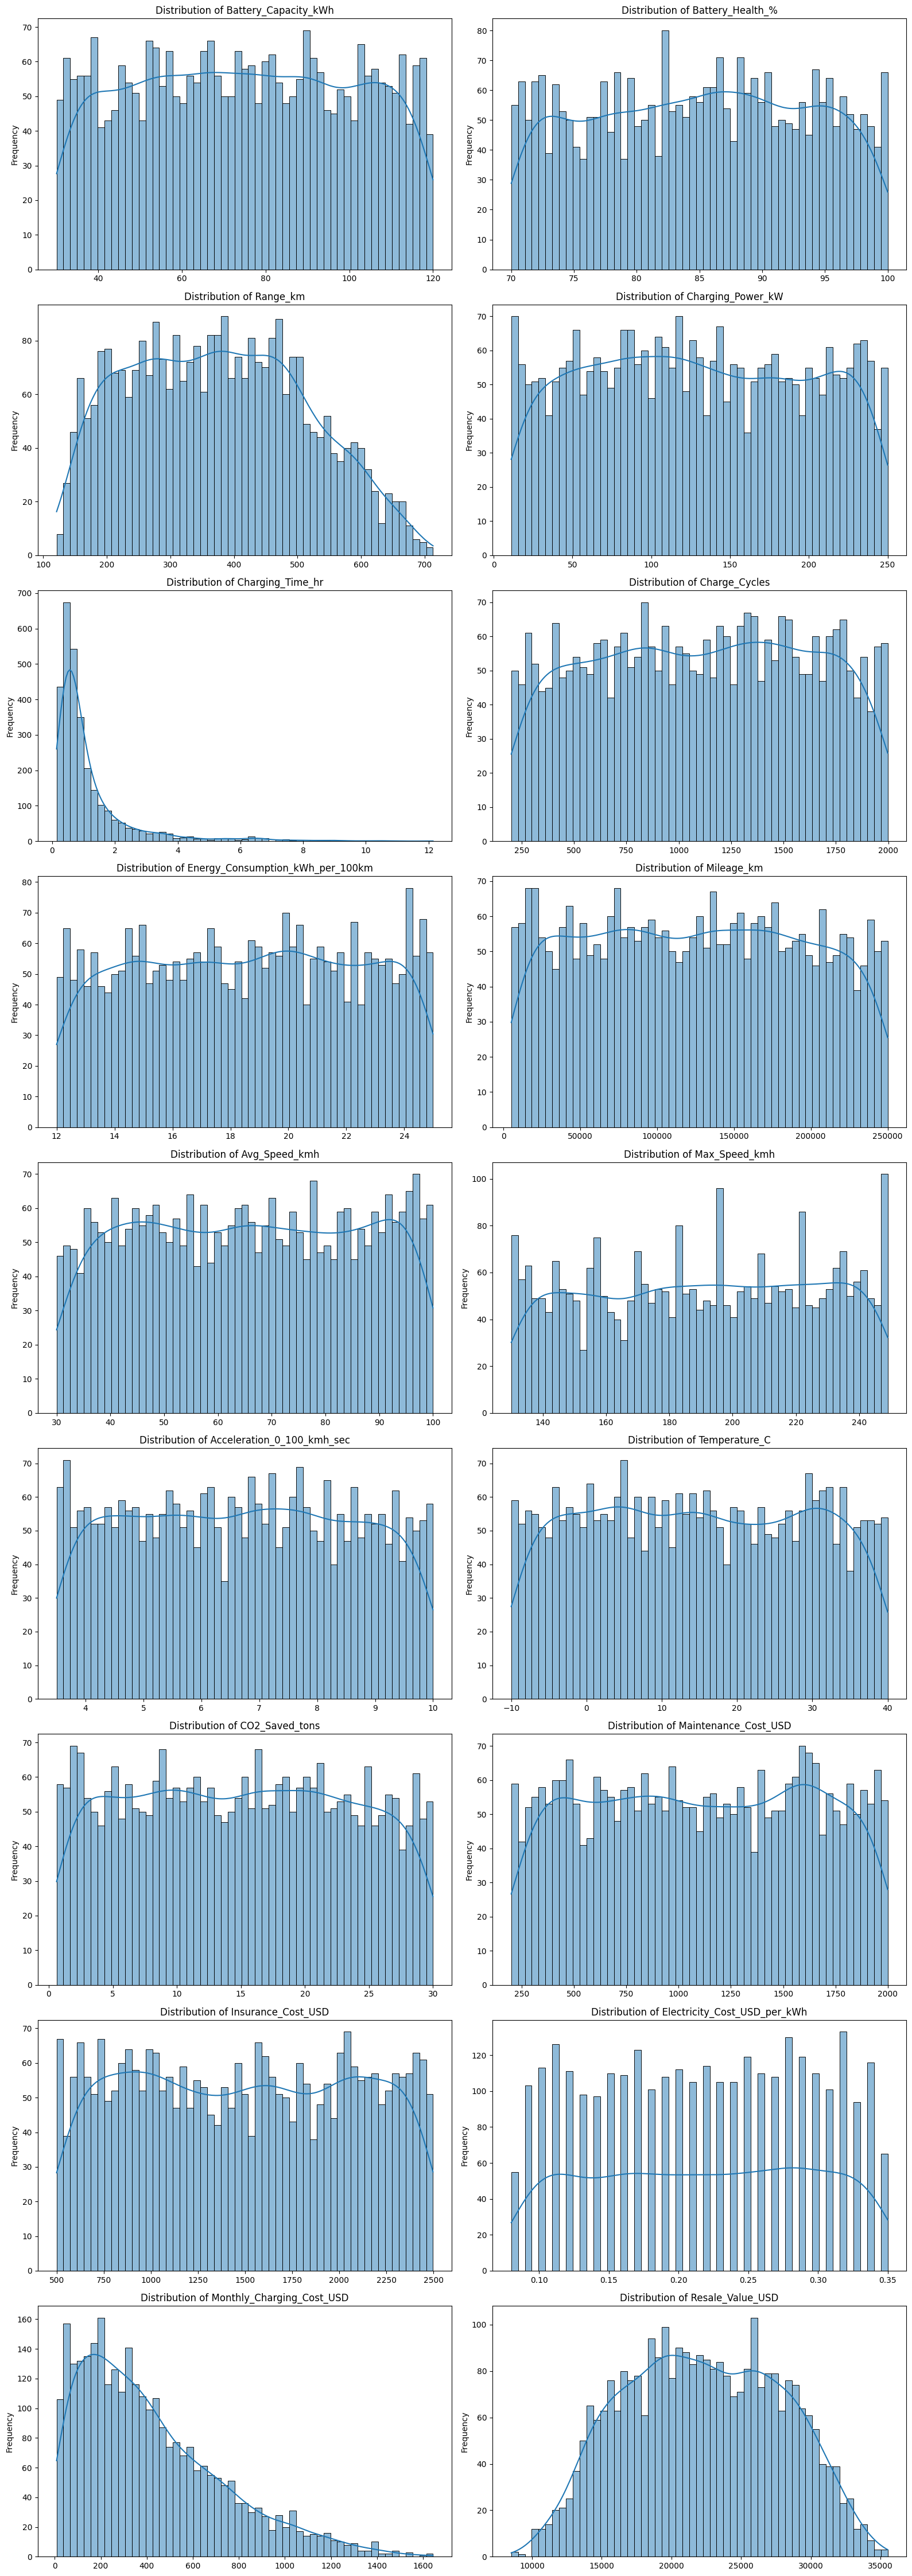

In [16]:
num_var = num_var.drop(columns='Vehicle_ID')
plot_num_hist(num_var)

#### Análise

A análise univariada revelou uma estrutura clara e fundamental no dataset. As variáveis podem ser divididas em dois grupos principais:
* Um grande grupo de **input**, que seguem uma **distribuição Uniforme**,
* E, um pequeno grupo de **output (ou outcome)**, que seguem distribuições **Normal** ou **Assimétrica Positiva**.

---

**Grupo 1: Variáveis de Input (Distribuição Uniforme)**

| Atributo | Categoria | Distribuição |
| :--- | :--- | :--- |
| **`Battery_Capacity_kWh`** | Projeto e Performance | Uniforme |
| **`Charging_Power_kW`** | Projeto e Performance | Uniforme |
| **`Energy_Consumption_kWh_per_100km`** | Projeto e Performance | Uniforme |
| **`Acceleration_0_100_kmh_sec`** | Projeto e Performance | Uniforme |
| **`Battery_Health_%`** | Uso e Idade | Uniforme |
| **`Charge_Cycles`** | Uso e Idade | Uniforme |
| **`Mileage_km`** | Uso e Idade | Uniforme |
| **`CO2_Saved_tons`** | Uso e Idade | Uniforme |
| **`Avg_Speed_kmh`** | Comportamental e Financeiro | Uniforme |
| **`Maintenance_Cost_USD`** | Comportamental e Financeiro | Uniforme |
| **`Insurance_Cost_USD`** | Comportamental e Financeiro | Uniforme |
| **`Temperature_C`** | Fatores Externos | Uniforme |
| **`Electricity_Cost_USD_per_kWh`** | Fatores Externos | Uniforme |

---

**Grupo 2: Variáveis de Output e Comportamentais**

Esta tabela resume as variáveis cujas distribuições seguem padrões estatísticos específicos, refletindo tendências de mercado e comportamento de uso.

| Atributo | Tipo de Distribuição | Interpretação do Padrão |
| :--- | :--- | :--- |
| **`Range_km`** | Normal | A autonomia tende a se concentrar em torno de um valor médio, típico do mercado atual. |
| **`Resale_Value_USD`** | Normal | O valor de revenda também converge para uma média, com valores extremos (muito altos ou baixos) sendo mais raros. |
| **`Charging_Time_hr`** | Assimétrica Positiva | A maioria dos carregamentos é rápida; tempos de recarga muito longos são eventos incomuns. |
| **`Monthly_Charging_Cost_USD`** | Assimétrica Positiva | Os custos mensais são, em geral, baixos, com picos de gastos sendo pouco frequentes. |

---


#### **Normalização**
>
> Conforme identificamos na distribuição, as variáveis `Charging_Time_hr` e `Monthly_Charging_Cost_USD` possuem uma forte assimetria positiva. Para mitigar esse efeito e aproximar suas distribuições da normalidade — o que é uma premissa importante para testes como ANOVA e um otimizador para modelos de regressão — nós aplicamos uma **transformação logarítmica**.
>

As novas variáveis, `log_Charging_Time_hr` e `log_Monthly_Charging_Cost_USD`, serão armazenadas em um novo DataFrame (`log_df`) para uso em análises futuras.

In [17]:
log_df = ev_df.copy()
log_df['log_Charging_Time_hr'] = np.log1p(log_df['Charging_Time_hr'])
log_df['log_Monthly_Charging_Cost_USD'] = np.log1p(log_df['Monthly_Charging_Cost_USD'])
log_df = log_df.drop(columns=['Charging_Time_hr', 'Monthly_Charging_Cost_USD'])
log_df.head()

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Resale_Value_USD,log_Charging_Time_hr,log_Monthly_Charging_Cost_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,8.10,-9.0,Personal,14.13,969,843,0.30,26483,0.598837,5.931051
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,9.83,1.6,Personal,19.41,1157,1186,0.25,11287,0.239017,6.278559
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,3.60,1.5,Fleet,29.39,291,1890,0.26,34023,0.609766,7.164473
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,8.97,12.5,Fleet,6.96,401,2481,0.33,14398,0.223144,5.461456
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,7.03,-3.0,Commercial,2.06,214,2336,0.10,23033,0.357674,3.514824


---

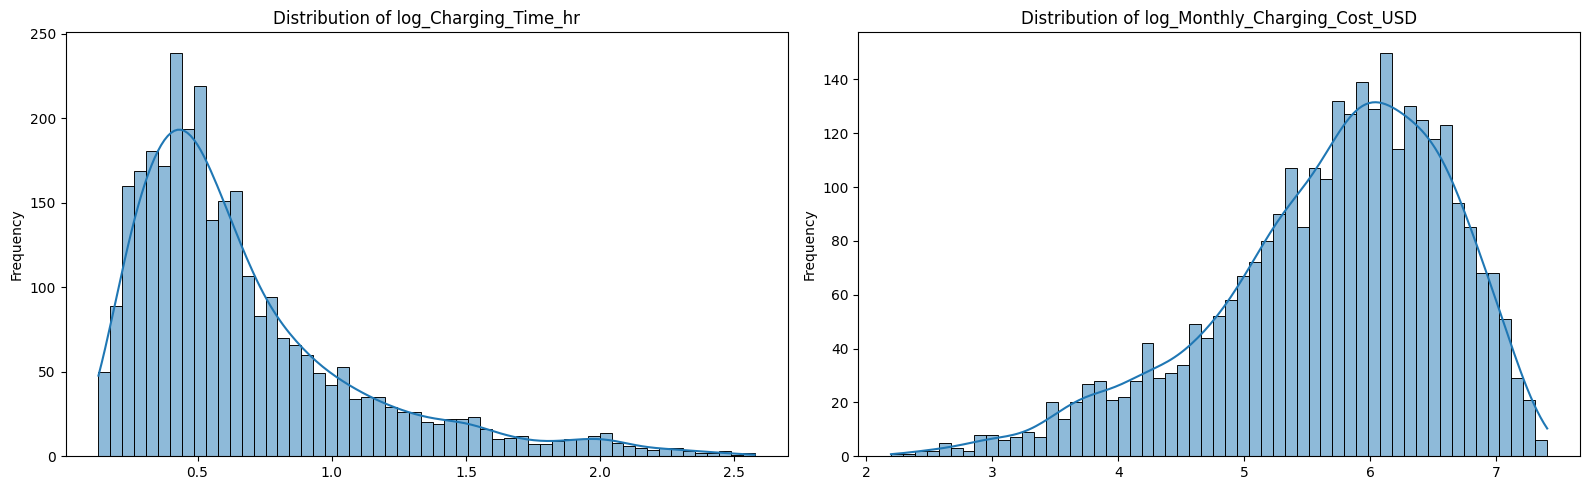

In [18]:
plot_num_hist(log_df[['log_Charging_Time_hr', 'log_Monthly_Charging_Cost_USD']])

#### **Resultados**

Após aplicarmos a transformação logarítmica, geramos novos histogramas para visualizar o impacto nas distribuições das variáveis `Charging_Time_hr` e `Monthly_Charging_Cost_USD`.

Como podemos observar nos gráficos acima, o resultado foi um sucesso. A forte assimetria positiva que existia anteriormente foi significativamente reduzida. Ambas as variáveis agora se assemelham muito mais a uma **distribuição normal**, tornando-as mais adequadas para os testes estatísticos (como a ANOVA) e para os modelos de Machine Learning.

---


### **d. Barplot**

In [19]:
def plt_cat_barcharts(df: DataFrame) -> None:
    """
    Gera e exibe gráficos de barras para cada coluna de um DataFrame categórico.

    A função cria uma contagem de frequência para cada valor único nas colunas
    e plota os resultados em uma grade. Um tratamento especial é dado à
    coluna 'Year', que é ordenada pelo índice (ano).

    Parâmetros
    ----------
    df : pd.DataFrame
        O DataFrame do pandas contendo as colunas categóricas a serem plotadas.

    Retorno
    -------
    None
        A função exibe o(s) gráfico(s) diretamente e não retorna nenhum valor.
    """
    # Conta o número de variáveis
    num_vars = len(df.columns)
    cols = 2
    # Calcula o número de linhas necessárias para a grade
    rows = (num_vars + cols - 1)

    # Cria a figura e os subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 5))
    # Transforma a matriz de eixosem um array simples
    axes = axes.flatten()

    # Itera sobre cada coluna do DataFrame com enumerate para obter o índice e o nome
    for i, col in enumerate(df.columns):
        # Condição especial para a coluna 'Year'
        if col == 'Year':
            # Se for 'Year', conta os valores e ordena pelo índice (ex: 2020, 2021, 2022)
            value_counts = df[col].value_counts().sort_index()
        else:
            # Para todas as outras colunas, conta os valores e ordena de forma decrescente
            value_counts = df[col].value_counts()

        # Prepara os dados para o gráfico de barras
        x = range(len(value_counts))
        y = value_counts.values

        # Define um mapa de cores para criar um gradiente visual nas barras
        cmap = plt.colormaps['YlOrBr']
        # Gera uma lista de cores, criando um efeito de gradiente
        colors = [cmap(1 - j/len(y)) for j in range(len(y))]

        # Cria o gráfico de barras no subplot correspondente
        bars = axes[i].bar(x, y, color=colors)
        # Define o título do subplot
        axes[i].set_title(f'Distribuição de {col}')
        # Define as posições dos "ticks" (marcas) no eixo x
        axes[i].set_xticks(x)
        # Define os rótulos dos "ticks" do eixo x, rotacionando-os para melhor visualização
        axes[i].set_xticklabels(value_counts.index.astype(str), rotation=45, ha='right')

        # Adiciona os rótulos de dados em cima de cada barra
        for bar in bars:
            height = bar.get_height()
            axes[i].text(
                x=bar.get_x() + bar.get_width() / 2,
                y=height,
                s=str(height),
                ha='center',
                va='bottom',
                fontsize=8
            )

    # Remove os eixos (subplots) que não foram utilizados
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

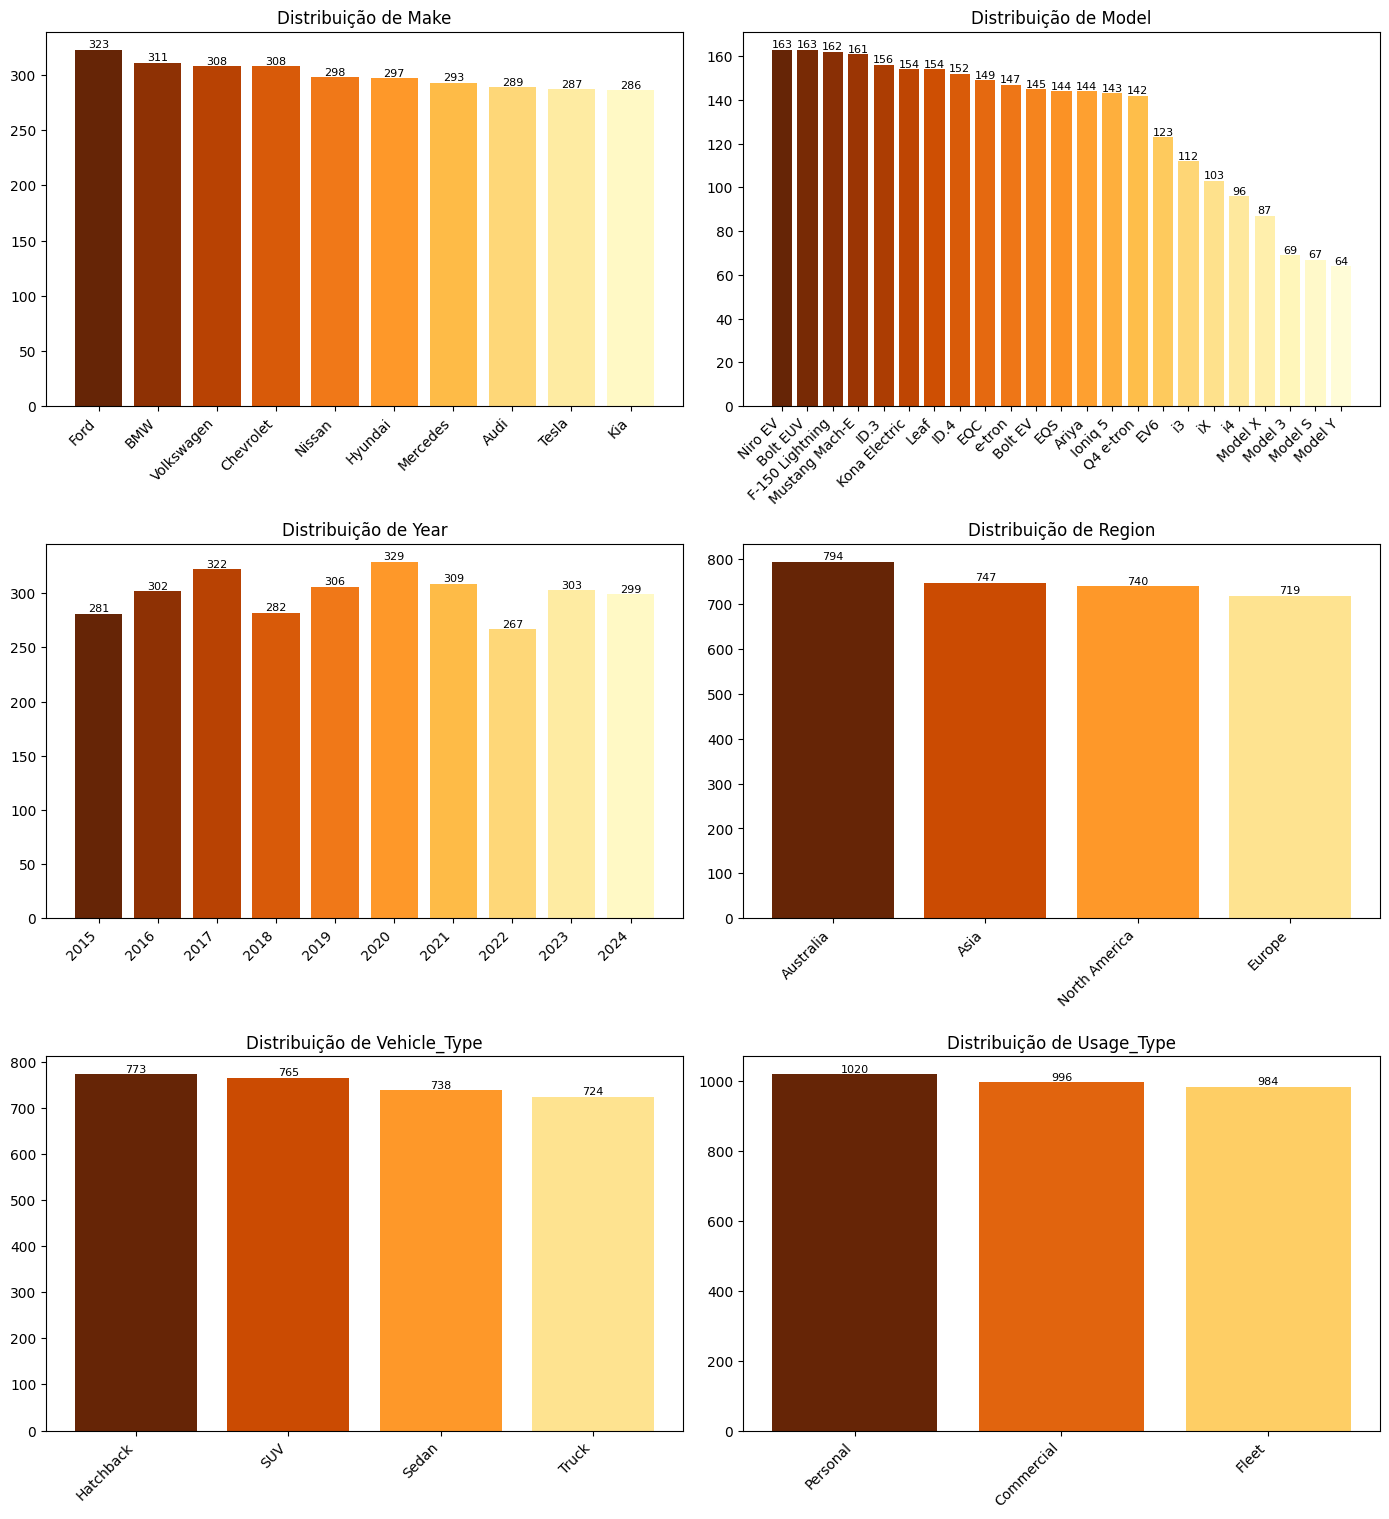

In [20]:
plt_cat_barcharts(cat_var)

#### **Análise**

* `Make`: **Extremamente equilibrada**. As principais marcas de veículos possuem uma contagem de amostras muito similar.

* `Model`: **Única variável desbalanceada**. <font color="red">Alguns modelos específicos têm uma frequência muito maior que outros.</font>

* `Year`: **Perfeitamente equilibrada**. Todos os anos entre 2015 e 2024 estão igualmente representados.

* `Region`: **Perfeitamente equilibrada**. As quatro principais regiões geográficas (Austrália, Ásia, América do Norte e Europa) têm representação quase idêntica.

* `Vehicle_Type`: **Perfeitamente equilibrada**. Hatchbacks, SUVs, Sedans e Picapes estão presentes em proporções iguais.

* `Usage_Type`: **Perfeitamente equilibrada**. Uso Pessoal, Comercial e de Frota estão igualmente distribuídos.

---

## **5. Análise Bivariada**


Agora que compreendemos as variáveis de forma isolada, vamos investigar como elas se relacionam entre si.<br>Nesta seção, nosso objetivo é identificar padrões e correlações que possam gerar insights sobre o comportamento dos veículos.


### **Heatmap Dataframe Original**

Nós iniciaremos com um heatmap para visualizar a matriz de correlação entre as **variáveis numéricas** do nosso dataset.<br> Uma forma rápida para identificar a **força** e a **direção** das relações lineares entre os pares de variáveis.

In [21]:
num_var.columns.to_list()

['Battery_Capacity_kWh',
 'Battery_Health_%',
 'Range_km',
 'Charging_Power_kW',
 'Charging_Time_hr',
 'Charge_Cycles',
 'Energy_Consumption_kWh_per_100km',
 'Mileage_km',
 'Avg_Speed_kmh',
 'Max_Speed_kmh',
 'Acceleration_0_100_kmh_sec',
 'Temperature_C',
 'CO2_Saved_tons',
 'Maintenance_Cost_USD',
 'Insurance_Cost_USD',
 'Electricity_Cost_USD_per_kWh',
 'Monthly_Charging_Cost_USD',
 'Resale_Value_USD']

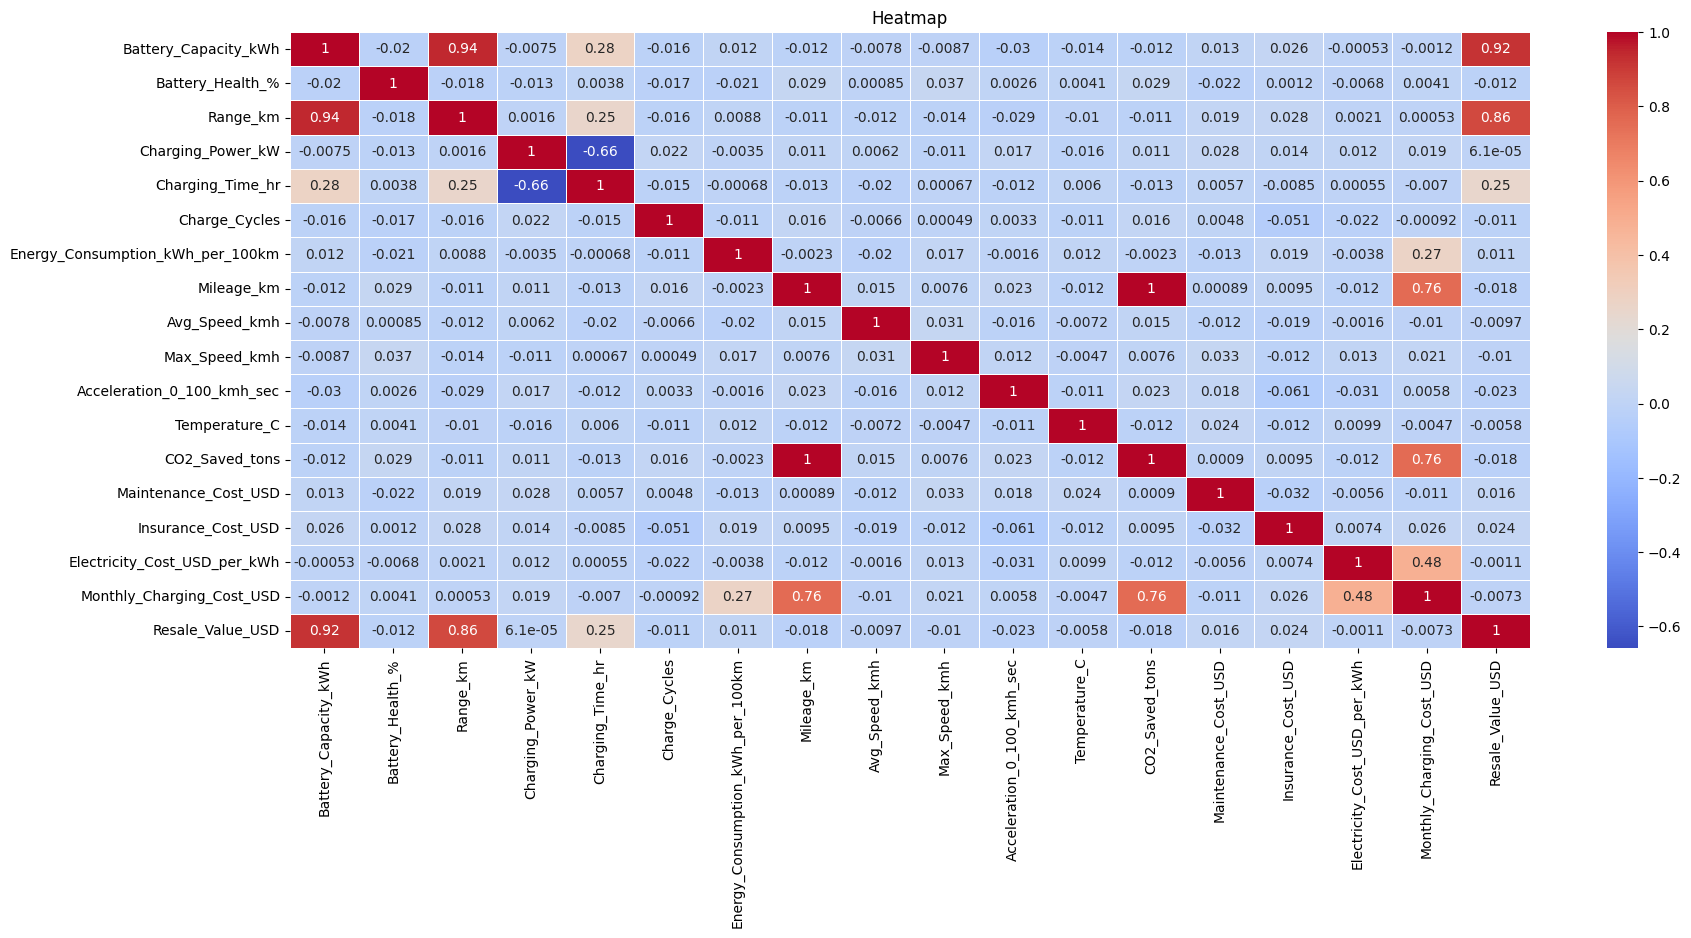

In [22]:
corr_matrix = num_var.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap')
plt.show()

##### **Análise**

###### **O Triângulo de Valor**

As correlações mais fortes formam um "triângulo dourado" que define o valor principal de um veículo elétrico:
* **`Battery_Capacity_kWh` vs. `Range_km` (+0.94):** **Extremamente Forte e Positiva**. Esta é a relação mais fundamental. Confirma de maneira inequívoca que o tamanho da bateria é o principal fator para determinar a autonomia do veículo.
* **`Battery_Capacity_kWh` vs. `Resale_Value_USD` (+0.92):** **Extremamente Forte e Positiva**. Veículos com baterias maiores têm um valor de revenda significativamente mais alto. A capacidade é percebida como um ativo de alto valor.
* **`Range_km` vs. `Resale_Value_USD` (+0.86):** **Muito Forte e Positiva**. A autonomia é um fator chave para o valor de revenda. Os consumidores valorizam e pagam mais por veículos que podem ir mais longe com uma única carga.

---

###### **A Dinâmica de Carregamento**

Aqui, vemos a principal troca (trade-off) envolvida no processo de carregamento:
* **`Charging_Power_kW` vs. `Charging_Time_hr` (-0.66):** **Moderadamente Forte e Negativa**. Esta correlação confirma a lógica de que quanto maior a potência de carregamento disponível, menor será o tempo necessário para recarregar a bateria.

---


###### O Custo de Utilização

Estas correlações nos mostram os principais fatores que influenciam o custo de rodar com o veículo:
* **`Mileage_km` vs. `CO2_Saved_tons` (+1.00):** **Perfeita**. Como suspeitávamos, estas duas variáveis são redundantes. Uma é apenas um cálculo direto da outra. Para modelagem, devemos usar apenas a `Mileage_km`.
* **`Mileage_km` vs. `Monthly_Charging_Cost_USD` (+0.76):** **Forte e Positiva**. O fator que mais influencia o custo mensal de carregamento é a distância percorrida. Isso é direto e intuitivo.
* **`Electricity_Cost_USD_per_kWh` vs. `Monthly_Charging_Cost_USD` (+0.48):** **Moderada e Positiva**. O preço da eletricidade também impacta o custo mensal, mas de forma menos intensa do que a quilometragem. Isso sugere que a *quantidade* de uso varia mais do que o *preço* da energia no dataset.

---

###### **Relações Fracas**

Os outros pares que você listou mostram correlações na faixa de 0.25 a 0.28.
* **`Battery_Capacity_kWh` vs. `Charging_Time_hr` (+0.28)**
* **`Range_km` vs. `Charging_Power_kW` (+0.25)**
* **`Energy_Consumption_kWh_per_100km` vs. `Monthly_Charging_Cost_USD` (+0.27)**
* **`Resale_Value_USD` vs. `Charging_Time_hr` (+0.25)**

Uma correlação nesta faixa é considerada **fraca**. Isso nos diz que não há uma tendência *linear* forte entre esses pares. Por exemplo, embora um carro com bateria maior possa demorar um pouco mais para carregar, outros fatores são mais importantes, então a relação não é clara e direta.

---

In [23]:
import math

def scatter_matrix(df: pd.DataFrame, pairs_to_plot: list) -> None:
    """
    Cria um scatterplot para uma lista de pares de variáveis.

    Args:
      df: Pandas DataFrame
      pairs_to_plot: lista de tuplas com o nome das colunas.
    """

    # Calcula o número total de pares
    n_pairs = len(pairs_to_plot)

    # Se a lista de pares estiver vazia, a função termina
    if n_pairs == 0:
      return

    # Define um número fixo de colunas
    ncols = 2
    # Calcula o número de linhas necessárias, arredondando-as
    nrows = math.ceil(n_pairs / ncols)
    # Cria a figura e os eixos (axes) com o tamanho calculado
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 5))

    # Transforma a matriz de eixos
    axes = axes.flatten()

    # Itera simultaneamente sobre os eixose os pares de variáveis
    for i, (ax, (x_var, y_var)) in enumerate(zip(axes, pairs_to_plot)):

        # Calcula a correlação de Pearson
        corr = df[x_var].corr(df[y_var])
        # Formata um título para o gráfico
        title = f'{x_var} vs {y_var} | Corr: {corr:.2f}'

        # Cria um gráfico de dispersão com uma linha de regressão
        sns.regplot(
            data=df, x=x_var, y=y_var, ax=ax,
            line_kws={"color": "red"}
        )

        # Define o limite inferior do eixo Y como 0
        ax.set_ylim(bottom=0)
        # Aplica o título formatado ao subplot atual
        ax.set_title(title)
        # Adiciona uma grade ao fundo
        ax.grid(True)

    # Itera sobre os eixos restantes que não foram usados
    for j in range(n_pairs, len(axes)):
        # Oculta os subplots vazios para um visual limpo
        axes[j].set_visible(False)

    # Ajusta o layout para evitar que os títulos e eixos dos gráficos se sobreponham
    plt.tight_layout()
    plt.show()

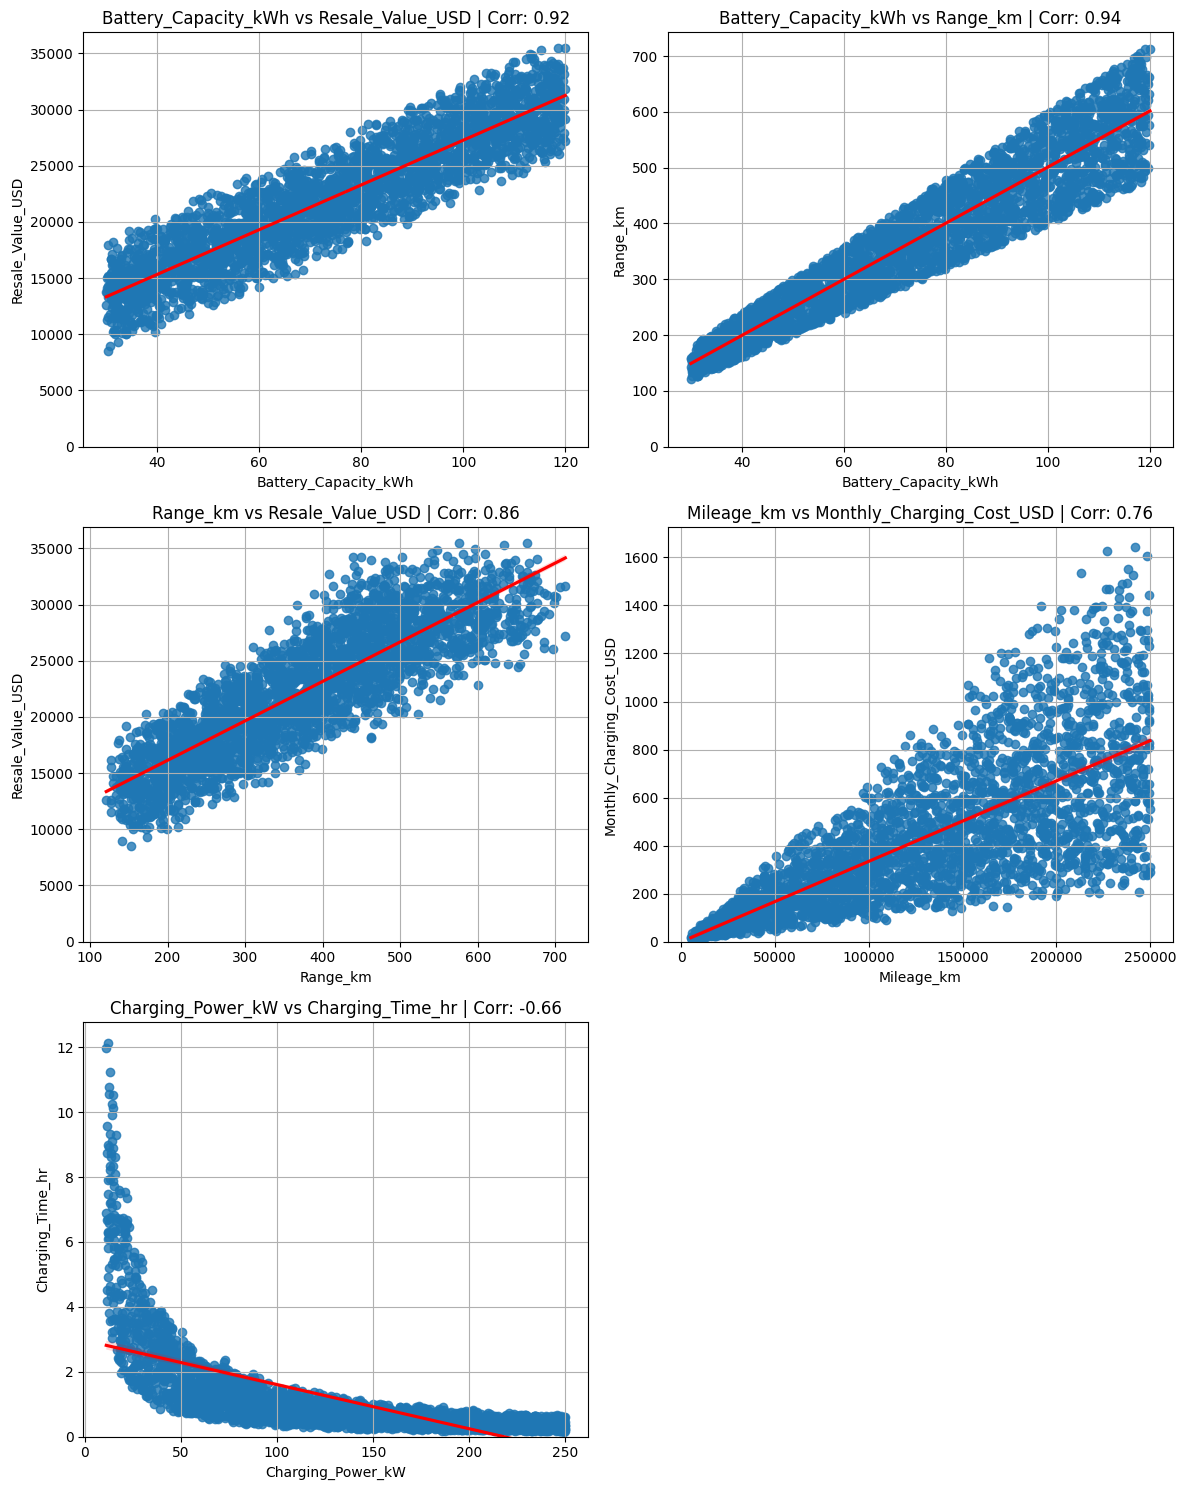

In [24]:
# Criamos uma lista de tuplas com as variáveis que desejamos analisar
pairs_to_plot = [
    ('Battery_Capacity_kWh', 'Resale_Value_USD'),
     ('Battery_Capacity_kWh', 'Range_km'),
      ('Range_km', 'Resale_Value_USD'),
       ('Mileage_km', 'Monthly_Charging_Cost_USD'),
        ('Charging_Power_kW', 'Charging_Time_hr')
]

scatter_matrix(num_var, pairs_to_plot)

 ##### **Considerações**

**1 - `Battery_Capacity_kWh` vs `Resale_Value_USD`**

* Linear Positiva;
* A capacidade da bateria é um dos principais, senão o principal, fator que agrega e sustenta o valor de um veículo elétrico;

Isso nos diz que os consumidores percebem a bateria grande não apenas como um recurso de conveniência (mais autonomia), mas como um ativo fundamental que justifica um preço mais alto. A força dessa relação sugere que a capacidade da bateria sozinha já é um preditor muito potente para o valor de revenda de um veículo.

---

**2 - `Battery_Capacity_kWh` vs `Range_km`**

Ao visualizarmos a relação em um gráfico de dispersão, confirmamos a forte **correlação linear positiva**. Como esperado, veículos com maior capacidade de bateria tendem a oferecer uma maior autonomia.

No entanto, notamos que os pontos não formam uma linha perfeita. Existe uma variância residual, ou seja, para uma mesma capacidade de bateria, encontramos diferentes valores de autonomia. Isso nos leva à pergunta: o que causa essa variação?

Nossa hipótese é que outros fatores, relacionados à eficiência e às condições de uso, são responsáveis por essa dispersão. Aqui, destacamos três variáveis explicativas principais:
* **`Energy_Consumption_kWh_per_100km`**
* **`Avg_Speed_kmh`**
* **`Temperature_C`**

---

**3 - `Range_km` vs `Resale_Value_USD`**
* Linear Positiva;
* Conforme a autonomia aumenta, o valor de revenda também sobe.
* Isso confirma que veículos com maior autonomia são mais desejados e, consequentemente, alcançam um maior valor de revenda.

O que indica que o valor de revenda é um fenômeno multivariado. A autonomia é um pilar na formação do preço, mas não age sozinha. A variabilidade nos leva a perguntar: quais outros fatores estão influenciando o valor final?

Nossa hipótese é que a dispersão é explicada por um conjunto de características do veículo e da marca:
* `Mileage_km`
* `Battery_Health_%`
* `Make`
* `Model`
* `Year`  

---

**4 - `Mileage_km` vs `Monthly_Charging_Cost_USD`**
* Linear Positiva;
* Curva em formato de cone;
* Carros com baixa quilometragem, o custo mensal de carregamento é previsivelmente baixo e com pouca variação.
* Carros com alta quilometragem, o custo mensal se torna imprevisível.

Enquanto um carro novo tem um custo mensal mais estável, o custo de um carro mais antigo pode variar drasticamente de mês a mês, dependendo da necessidade de uso do proprietário.

Aqui, podemos observamos um fenômeno conhecido como **heterocedasticidade**, onde a variabilidade de uma variável (`Monthly_Charging_Cost_USD`) muda ao longo da faixa de valores de outra variável (`Mileage_km`).

Visualmente, isso cria o **formato de cone**

* **Ponta do Cone (Baixa Quilometragem):** Para veículos com baixa quilometragem (mais novos ou menos rodados), o custo mensal de recarga é consistentemente baixo e previsível. A dispersão dos dados aqui é mínima, indicando um padrão de uso estável.

* **Abertura do Cone (Alta Quilometragem):** À medida que a quilometragem aumenta, a dispersão do custo mensal de recarga cresce drasticamente. Para um mesmo nível de quilometragem alta, encontramos tanto custos mensais baixos quanto muito altos. A previsibilidade diminui significativamente.

**Implicação Técnica para Modelagem**

Este padrão é um **alerta importante para a modelagem preditiva**. Modelos de regressão linear clássicos assumem *homocedasticidade*. A clara presença de heterocedasticidade em nossos dados pode violar essa premissa, o que poderia exigir o uso de transformações de variáveis ou modelos de regressão mais robustos para gerar previsões confiáveis.

---

**5 - `Charging_Power_kW` vs `Charging_Time_hr`**
* Não-Linear Negativa (Inversa);
* Região de **baixa potência**: Passar de um carregador de 10 kW para um de 50 kW resulta em uma economia de tempo gigantesca.
* Região de **alta potência**: Passar de um carregador de 150 kW para um de 200 kW resulta em uma economia de tempo muito menor, quase marginal.

O gráfico revela uma clara relação inversa não linear. O padrão observado é um exemplo clássico da "Lei dos Rendimentos Decrescentes", onde o benefício de adicionar mais um recurso (neste caso, potência) diminui a cada incremento.

---

### **b. Heatmap log_Dataframe**

In [25]:
log_df = log_df.drop(columns='Vehicle_ID')
log_df.head()

,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,Charge_Cycles,...,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Resale_Value_USD,log_Charging_Time_hr,log_Monthly_Charging_Cost_USD
0,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,1438,...,8.10,-9.0,Personal,14.13,969,843,0.30,26483,0.598837,5.931051
1,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,1056,...,9.83,1.6,Personal,19.41,1157,1186,0.25,11287,0.239017,6.278559
2,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,1497,...,3.60,1.5,Fleet,29.39,291,1890,0.26,34023,0.609766,7.164473
3,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,1613,...,8.97,12.5,Fleet,6.96,401,2481,0.33,14398,0.223144,5.461456
4,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,1078,...,7.03,-3.0,Commercial,2.06,214,2336,0.10,23033,0.357674,3.514824


In [26]:
log_categorical = log_df.select_dtypes(include='object')
log_numerical = log_df.select_dtypes(exclude='object')

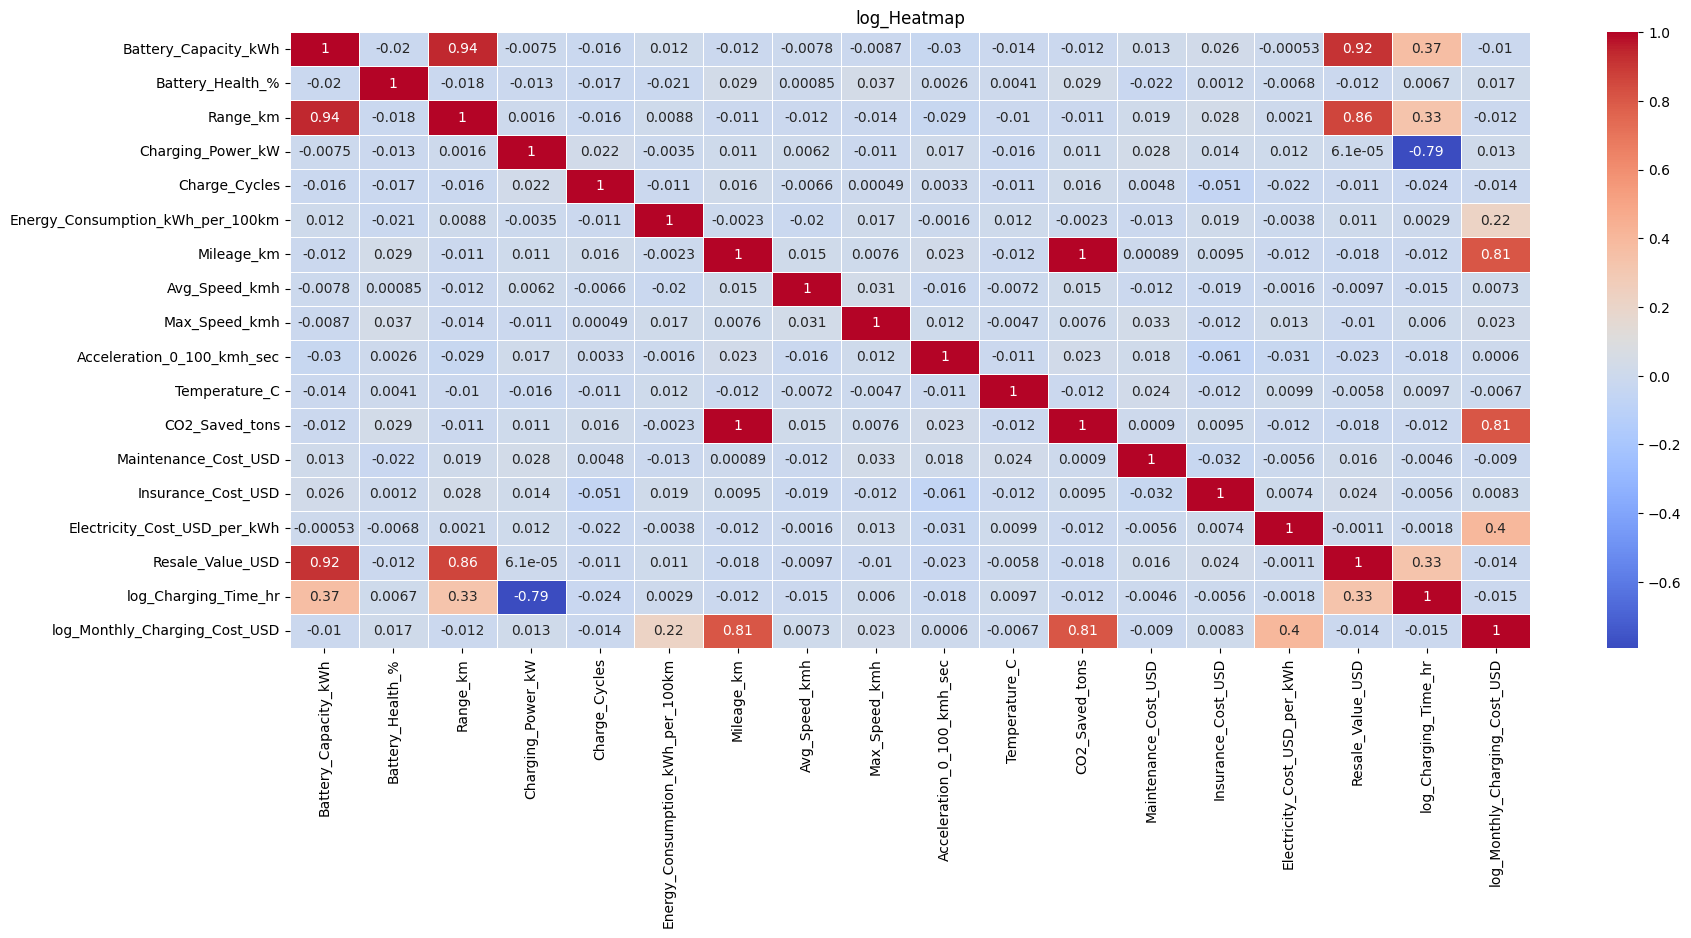

In [27]:
corr_matrix = log_numerical.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('log_Heatmap')
plt.show()

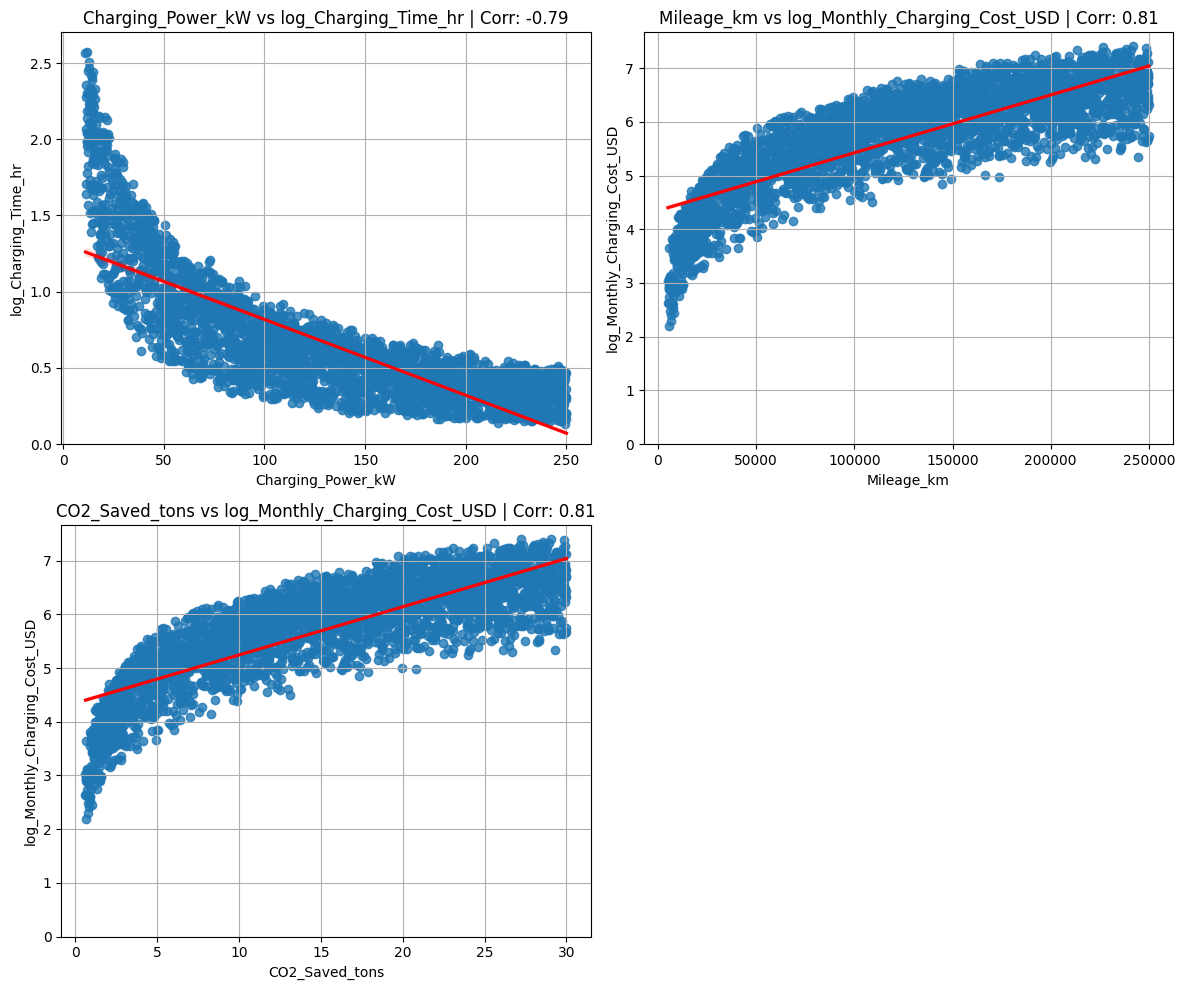

In [28]:
# Criamos uma lista de tuplas com as variáveis que desejamos analisar
pairs_to_plot = [
    ('Charging_Power_kW', 'log_Charging_Time_hr'),
    ('Mileage_km', 'log_Monthly_Charging_Cost_USD'),
    ('CO2_Saved_tons', 'log_Monthly_Charging_Cost_USD')
]

scatter_matrix(log_numerical, pairs_to_plot)

### **Análise**


#### **Carregamento: Potência vs Log Tempo**


* **Heatmap Original:** A correlação entre `Charging_Power_kW` e `Charging_Time_hr` era de **-0.66**. Uma correlação negativa forte, mas não perfeita.
* **log_Heatmap:** A correlação entre `Charging_Power_kW` e `log_Charging_Time_hr` saltou para **-0.79**.

A relação original era uma curva inversa. A transformação logarítmica "linearizou" essa relação, fazendo com que o coeficiente de Pearson, agora, capture a força da associação de forma muito mais precisa. Um valor de **-0.79** indica uma relação linear negativa **muito forte**.

---

#### **Log Custo Mensal**

Aqui as coisas ficam ainda mais interessantes, especialmente quando olhamos para a quilometragem e o CO₂ economizado.

* **Relação com `Mileage_km`:**
    * **Antes:** A correlação entre `Mileage_km` e `Monthly_Charging_Cost_USD` era **0.27**.
    * **Depois:** A correlação entre `Mileage_km` e `log_Monthly_Charging_Cost_USD` **subiu para 0.81**

* **Relação com `CO2_Saved_tons`:**
    * **Antes:** A correlação entre `CO2_Saved_tons` e `Monthly_Charging_Cost_USD` era **0.26**.
    * **Depois:** A correlação entre `CO2_Saved_tons` e `log_Monthly_Charging_Cost_USD` **aumentou drasticamente para 0.81**.

Ao analisar o novo heatmap, nós observamos dois efeitos principais que validam e enriquecem nossa análise:

>**Linearização da Relação Inversa (Tempo de Recarga):**
A mudança mais notável ocorreu na relação entre `Charging_Power_kW` e `log_Charging_Time_hr`. A correlação se intensificou para **-0.79**. O coeficiente de Pearson agora captura de forma mais fiel a forte associação entre as duas variáveis.
>
>**Estabilização da Relação de Custo (Custo de Recarga):**
Observamos que, após a transformação, `log_Monthly_Charging_Cost_USD` agora apresenta uma **forte correlação positiva** com `Mileage_km` (**0.81**) e `CO2_Saved_tons` (**0.81**). Isso sugere que, ao estabilizar a variância da variável de custo e reduzir o efeito de possíveis outliers, a transformação revelou uma forte e consistente tendência linear: maior uso do veículo está diretamente associado a maiores custos de recarga ao longo do tempo.

---


### **c. Análise de Variância (ANOVA)**

Enquanto a correlação mede a relação entre duas variáveis numéricas, nós agora queremos entender o impacto de uma variável categórica em uma variável numérica. A ferramenta estatística ideal para isso é a ANOVA.

A pergunta central que a ANOVA nos ajuda a responder é:
> A média da minha variável numérica é estatisticamente diferente entre os grupos definidos pela minha variável categórica?

---

#### **Premissas para ANOVA**

Antes de aplicar o teste, é uma boa prática verificar se as premissas de normalidade dos dados (dentro dos grupos) e de homogeneidade das variâncias são atendidas.

In [29]:
from scipy import stats

def testar_normalidade_combinacoes(
    df: pd.DataFrame,
    alpha: float = 0.05,
    limiar_aprovacao: float = 0.8
) -> pd.DataFrame:
    """Testa a premissa de normalidade para ANOVA em todas as combinações.

    A função identifica automaticamente as colunas categóricas e numéricas
    e testa a normalidade da variável numérica dentro de cada grupo da
    variável categórica para cada par possível.

    Não há saída visual. A função retorna um DataFrame com o resumo dos
    testes.

    Parâmetros
    ----------
    df : pd.DataFrame
        O DataFrame a ser analisado.
    alpha : float, opcional
        O nível de significância para o teste de Shapiro-Wilk. O padrão é 0.05.
    limiar_aprovacao : float, opcional
        A proporção mínima de grupos que devem passar no teste de normalidade
        para que a combinação seja considerada aprovada. O padrão é 0.8 (80%).

    Retorno
    -------
    pd.DataFrame
        Um DataFrame resumindo os resultados para cada combinação, contendo
        as variáveis, a proporção de grupos normais e se a combinação
        passou no critério de aprovação.
    """
    # Identificar automaticamente as colunas categóricas e numéricas
    vars_categoricas = df.select_dtypes(include=['object', 'category']).columns
    vars_numericas = df.select_dtypes(include=np.number).columns

    # Lista para armazenar os resultados de cada combinação
    resultados_finais = []

    print(f"Analisando {len(vars_categoricas)} variáveis categóricas vs. {len(vars_numericas)} variáveis numéricas...")

    # Iterar sobre cada combinação possível
    for cat_var in vars_categoricas:
        for num_var in vars_numericas:

            grupos = df[cat_var].unique()
            n_grupos = len(grupos)

            # Pula se não houver pelo menos 2 grupos para comparar
            if n_grupos < 2:
                continue

            grupos_normais = 0
            grupos_validos = 0  # Grupos com dados suficientes para o teste

            # Teste silencioso para cada subgrupo
            for grupo in grupos:
                dados_grupo = df[df[cat_var] == grupo][num_var].dropna()

                # O teste de Shapiro-Wilk precisa de pelo menos 3 amostras
                if len(dados_grupo) >= 3:
                    grupos_validos += 1
                    stat, p_valor = stats.shapiro(dados_grupo)

                    if p_valor > alpha:
                        grupos_normais += 1

            # Se nenhum grupo tiver dados suficientes, pula a combinação
            if grupos_validos == 0:
                proporcao = 0.0
                passou_no_teste = False
            else:
                proporcao = grupos_normais / grupos_validos
                passou_no_teste = proporcao >= limiar_aprovacao

            # Adiciona o resultado consolidado da combinação à lista
            resultados_finais.append({
                'Variavel_Categorica': cat_var,
                'Variavel_Numerica': num_var,
                'Total_Grupos': grupos_validos,
                'Grupos_Normais': grupos_normais,
                'Proporcao_Normal': round(proporcao, 2),
                'Aprovado': passou_no_teste
            })

    print("Análise concluída.")
    # Retorna a lista de resultados como um DataFrame
    return pd.DataFrame(resultados_finais)

In [30]:
normalidade = testar_normalidade_combinacoes(ev_df)

Analisando 6 variáveis categóricas vs. 19 variáveis numéricas...
Análise concluída.


In [31]:
log_normalidade = testar_normalidade_combinacoes(log_df)

Analisando 6 variáveis categóricas vs. 18 variáveis numéricas...
Análise concluída.


In [32]:
normalidade = normalidade.sort_values(by='Aprovado', ascending=False)
normalidade

,Variavel_Categorica,Variavel_Numerica,Total_Grupos,Grupos_Normais,Proporcao_Normal,Aprovado
0,Make,Vehicle_ID,10,0,0.00,False
85,Vehicle_Type,Avg_Speed_kmh,4,0,0.00,False
83,Vehicle_Type,Energy_Consumption_kWh_per_100km,4,0,0.00,False
82,Vehicle_Type,Charge_Cycles,4,0,0.00,False
81,Vehicle_Type,Charging_Time_hr,4,0,0.00,False
...,...,...,...,...,...,...
34,Model,Insurance_Cost_USD,23,1,0.04,False
33,Model,Maintenance_Cost_USD,23,0,0.00,False
32,Model,CO2_Saved_tons,23,1,0.04,False
31,Model,Temperature_C,23,0,0.00,False


In [33]:
log_normalidade = log_normalidade.sort_values(by='Aprovado', ascending=False)
log_normalidade

,Variavel_Categorica,Variavel_Numerica,Total_Grupos,Grupos_Normais,Proporcao_Normal,Aprovado
0,Make,Battery_Capacity_kWh,10,0,0.00,False
68,Region,Electricity_Cost_USD_per_kWh,4,0,0.00,False
79,Vehicle_Type,Avg_Speed_kmh,4,0,0.00,False
78,Vehicle_Type,Mileage_km,4,0,0.00,False
77,Vehicle_Type,Energy_Consumption_kWh_per_100km,4,0,0.00,False
...,...,...,...,...,...,...
32,Model,Electricity_Cost_USD_per_kWh,23,0,0.00,False
31,Model,Insurance_Cost_USD,23,1,0.04,False
30,Model,Maintenance_Cost_USD,23,0,0.00,False
29,Model,CO2_Saved_tons,23,1,0.04,False


A ANOVA, com suas premissas estritas, não é a ferramenta mais adequada para  determinar se existe uma diferença estatisticamente significativa entre dois ou mais grupos, com base em uma variável categórica e uma numérica. A solução para este caso é utilizar a alternativa não paramétrica.

Entretando, para fins de comparação, vou manter os relatórios gerados pela ANOVA para o `ev_df` e `log_df`

---

#### **Teste de Kruskal-Wallis**

In [34]:
def testar_kruskal_wallis_combinacoes(
    df: pd.DataFrame,
    alpha: float = 0.05
) -> pd.DataFrame:
    """Testa a significância da diferença entre grupos para todas as combinações.

    Esta função identifica automaticamente as colunas categóricas e numéricas
    e aplica o teste de Kruskal-Wallis para cada par, verificando se há diferença
    estatisticamente significativa entre as distribuições dos grupos.

    Parâmetros
    ----------
    df : pd.DataFrame
        O DataFrame a ser analisado.
    alpha : float, opcional
        O nível de significância para o teste.

    Retorno
    -------
    pd.DataFrame
        Um DataFrame resumindo os resultados para cada combinação, contendo
        as variáveis, a estatística H, o p-valor e uma conclusão sobre a
        significância estatística.
    """
    # Identificar automaticamente as colunas
    vars_categoricas = df.select_dtypes(include=['object', 'category']).columns
    vars_numericas = df.select_dtypes(include=np.number).columns

    resultados_finais = []

    print(f"Analisando {len(vars_categoricas)} variáveis categóricas vs. {len(vars_numericas)} variáveis numéricas...")

    # Iterar sobre cada combinação possível
    for cat_var in vars_categoricas:
        for num_var in vars_numericas:

            grupos = df[cat_var].unique()

            # O teste precisa de pelo menos 2 grupos para comparar
            if len(grupos) < 2:
                continue

            # Preparar os dados para o teste
            # A função stats.kruskal espera uma série de amostras (uma para cada grupo)
            amostras = []
            for grupo in grupos:
                amostra_grupo = df[df[cat_var] == grupo][num_var].dropna()
                if not amostra_grupo.empty:
                    amostras.append(amostra_grupo)

            # Se não houver pelo menos 2 grupos com dados, não podemos comparar
            if len(amostras) < 2:
                continue

            # Executar o teste de Kruskal-Wallis
            try:
                stat_h, p_valor = stats.kruskal(*amostras)

                # Armazenar o resultado
                resultados_finais.append({
                    'Variavel_Categorica': cat_var,
                    'Variavel_Numerica': num_var,
                    'Estatistica_H': round(stat_h, 4),
                    'p_valor': round(p_valor, 4),
                    'Diferenca_Significativa': p_valor < alpha
                })
            except ValueError:
                # Ocorre se alguma amostra tiver todos os valores iguais, por exemplo.
                # Apenas ignoramos essa combinação.
                continue

    print("Análise concluída.")
    # Retorna a lista de resultados como um DataFrame
    return pd.DataFrame(resultados_finais)

In [35]:
kruskal_test_original_df = testar_kruskal_wallis_combinacoes(ev_df)

Analisando 6 variáveis categóricas vs. 19 variáveis numéricas...
Análise concluída.


In [36]:
kruskal_test_log_df = testar_kruskal_wallis_combinacoes(log_df)

Analisando 6 variáveis categóricas vs. 18 variáveis numéricas...
Análise concluída.


In [37]:
kruskal_test_original_df

,Variavel_Categorica,Variavel_Numerica,Estatistica_H,p_valor,Diferenca_Significativa
0,Make,Vehicle_ID,5.6214,0.7771,False
1,Make,Battery_Capacity_kWh,12.3658,0.1935,False
2,Make,Battery_Health_%,10.5585,0.3072,False
3,Make,Range_km,11.2215,0.2608,False
4,Make,Charging_Power_kW,5.3798,0.8000,False
...,...,...,...,...,...
109,Usage_Type,Maintenance_Cost_USD,1.6418,0.4400,False
110,Usage_Type,Insurance_Cost_USD,4.0670,0.1309,False
111,Usage_Type,Electricity_Cost_USD_per_kWh,1.5184,0.4680,False
112,Usage_Type,Monthly_Charging_Cost_USD,5.2975,0.0707,False


In [38]:
kruskal_test_log_df

,Variavel_Categorica,Variavel_Numerica,Estatistica_H,p_valor,Diferenca_Significativa
0,Make,Battery_Capacity_kWh,12.3658,0.1935,False
1,Make,Battery_Health_%,10.5585,0.3072,False
2,Make,Range_km,11.2215,0.2608,False
3,Make,Charging_Power_kW,5.3798,0.8000,False
4,Make,Charge_Cycles,5.8118,0.7586,False
...,...,...,...,...,...
103,Usage_Type,Insurance_Cost_USD,4.0670,0.1309,False
104,Usage_Type,Electricity_Cost_USD_per_kWh,1.5184,0.4680,False
105,Usage_Type,Resale_Value_USD,1.0398,0.5946,False
106,Usage_Type,log_Charging_Time_hr,2.3609,0.3071,False


Um p-valor maior que 0.05 no teste de Kruskal-Wallis nos diz que:
 * **Não há evidência estatística** para afirmar que a distribuição da variável numérica muda entre as categorias.

> O resultado confirma a ausência de viés categórico.

#### **Continuação ANOVA**

A seguir, apresentamos a aplicação da Análise de Variância para investigar o impacto das variáveis categóricas nas numéricas. É crucial ressaltar que, conforme diagnosticado em nossa análise de premissas, os dados não atenderam plenamente ao requisito de normalidade, que é fundamental para a validade da ANOVA.

Portanto, os resultados desta seção devem ser interpretados com cautela. **Nós a mantemos neste notebook para fins acadêmicos e comparativos**, com o objetivo de demonstrar a aplicação do método. A análise definitiva e as conclusões formais sobre a significância estatística serão baseadas no teste não paramétrico de Kruskal-Wallis, apresentado na seção subsequente, que é a abordagem mais robusta para este conjunto de dados.

In [39]:
from scipy import stats

def comb_anova(df: pd.DataFrame, vars_categoricas: list, vars_numericas: list) -> DataFrame:
    """
    Executa o teste ANOVA para todas as combinações de variáveis categóricas e numéricas.

    Args:
        df: O DataFrame contendo os dados.
        vars_categoricas: Uma lista com os nomes das colunas categóricas.
        vars_numericas: Uma lista com os nomes das colunas numéricas.

    Returns:
        Um DataFrame com os resultados de todos os testes, ordenado pelo p-valor.
    """
    result = []

    # Itera por cada variável categórica
    for cat_var in vars_categoricas:
        for num_var in vars_numericas:
            grupos = [df[num_var][df[cat_var] == cat] for cat in df[cat_var].unique()]

            # Realiza o teste ANOVA
            f_stat, p_value = stats.f_oneway(*grupos)

            # Armazena os resultados
            result.append({
                'Variável Categórica (Grupos)': cat_var,
                'Variável Numérica (Medida)': num_var,
                'Estatística F': f_stat,
                'p-valor': p_value
            })

    # Converte a lista de resultados em um DataFrame e ordena pelo p-valor
    return pd.DataFrame(result).sort_values(by='p-valor').reset_index(drop=True)

In [40]:
# Dataframe Original
anova_df = comb_anova(ev_df, cat_var.columns.to_list(), num_var.columns.to_list()).head(15)

In [41]:
# Dataframe transformado
log_anova_df = comb_anova(log_df, log_categorical.columns.to_list(), log_numerical.columns.to_list())

##### **Hipóteses**

1.  **Hipótese Nula ($H_0$)**:
    **Não há diferença** entre as médias dos grupos.

    $$H_0: \mu_1 = \mu_2 = \mu_3 = \dots = \mu_k$$

2.  **Hipótese Alternativa ($H_1$)**
    **Existe uma diferença** em pelo menos um dos grupos.

    $$H_a: \text{Pelo menos uma das médias } \mu_i \text{ é diferente das outras.}$$


##### **P-valor**

Se o p-valor $\le \alpha$
  * **Rejeita-se a Hipótese Nula ($H_0$)**.

Se o p-valor $> \alpha$
  * **Não se rejeita a Hipótese Nula ($H_0$)**.

In [42]:
alpha = 0.05

In [43]:
anova_df['Significativo'] = anova_df['p-valor'] <= alpha
anova_df.head(15)

,Variável Categórica (Grupos),Variável Numérica (Medida),Estatística F,p-valor,Significativo
0,Year,Resale_Value_USD,22.051845,1.306784e-36,True
1,Region,Maintenance_Cost_USD,4.140716,6.135485e-03,True
2,Model,Insurance_Cost_USD,1.691195,2.306676e-02,True
3,Region,Charging_Time_hr,3.087136,2.616109e-02,True
4,Usage_Type,Monthly_Charging_Cost_USD,3.445941,3.200111e-02,True
5,Region,Resale_Value_USD,2.934748,3.217643e-02,True
6,Usage_Type,Charge_Cycles,3.215382,4.027849e-02,True
7,Region,Acceleration_0_100_kmh_sec,2.766916,4.037161e-02,True
8,Make,Temperature_C,1.855339,5.412305e-02,False
9,Region,Charging_Power_kW,2.514611,5.665053e-02,False


In [44]:
log_anova_df['Significativo'] = anova_df['p-valor'] <= alpha
log_anova_df.head(15)

,Variável Categórica (Grupos),Variável Numérica (Medida),Estatística F,p-valor,Significativo
0,Year,Resale_Value_USD,22.051845,1.306784e-36,True
1,Region,Maintenance_Cost_USD,4.140716,6.135485e-03,True
2,Region,log_Charging_Time_hr,3.417694,1.665316e-02,True
3,Model,Insurance_Cost_USD,1.691195,2.306676e-02,True
4,Region,Resale_Value_USD,2.934748,3.217643e-02,True
5,Usage_Type,Charge_Cycles,3.215382,4.027849e-02,True
6,Region,Acceleration_0_100_kmh_sec,2.766916,4.037161e-02,True
7,Make,Temperature_C,1.855339,5.412305e-02,True
8,Region,Charging_Power_kW,2.514611,5.665053e-02,False
9,Model,Resale_Value_USD,1.488573,6.653378e-02,False


##### **Análises**

In [45]:
df_significativo = anova_df[anova_df['Significativo'] == True]
df_significativo

,Variável Categórica (Grupos),Variável Numérica (Medida),Estatística F,p-valor,Significativo
0,Year,Resale_Value_USD,22.051845,1.306784e-36,True
1,Region,Maintenance_Cost_USD,4.140716,6.135485e-03,True
2,Model,Insurance_Cost_USD,1.691195,2.306676e-02,True
3,Region,Charging_Time_hr,3.087136,2.616109e-02,True
4,Usage_Type,Monthly_Charging_Cost_USD,3.445941,3.200111e-02,True
5,Region,Resale_Value_USD,2.934748,3.217643e-02,True
6,Usage_Type,Charge_Cycles,3.215382,4.027849e-02,True
7,Region,Acceleration_0_100_kmh_sec,2.766916,4.037161e-02,True


**1 - `Year` vs `Resale_Value_USD`**

O ano de fabricação do veículo é o fator categórico que mais influencia o valor de revenda.

---

**2 - `Region` vs ( `Maintenance_Cost_USD`, `Charging_Time_hr`,`Resale_Value_USD` )**

A região onde o carro opera tem um impacto real e multifacetado. Isso pode ser devido a diferenças economicas, de clima, infraestrutura de recarga, custos de mão de obra ou até mesmo preferências de mercado locais .

---

**3 - `Model` vs `Insurance_Cost_USD`**

O modelo do veículo impactam diretamente os custos de seguro, o que é esperado e lógico.


---

**4 - `Usage_Type` vs `Monthly_Charging_Cost_USD`**

O tipo de aplicação do veículo impactam diretamente os custos mensai.

---

In [46]:
# List of tuples to plot
list_features = list(zip(df_significativo['Variável Categórica (Grupos)'], df_significativo['Variável Numérica (Medida)']))

In [47]:
def boxplot_anova(df: pd.DataFrame, pair_list: list) -> None:
    """
    Cria uma grade de subplots com boxplots para cada par de variáveis
    categórica e numérica.

        Args:
        df: O DataFrame contendo os dados.
        pair_list: Lista de tuplas com os nomes das colunas categóricas e numéricas.
    """
    if not pair_list:
        print("A lista de pares está vazia. Nenhum gráfico para gerar.")
        return

    n_pares = len(pair_list)
    n_cols = 2
    n_rows = math.ceil(n_pares / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 12, n_rows * 7))
    axes = axes.flatten()

    for ax, (var_categorica, var_numerica) in zip(axes, pair_list):

        # Inicializamos a variável com um valor padrão 'None'
        order_by_median = None

        # Se a condição for atendida, o gráfico será ordenado pela mediana
        # Se não, será ordenada pelo 'Year' em ordem crescente
        if var_categorica != 'Year':
            # Ordena de forma decrescente em relação a mediana
            median_boxplot = df.groupby(var_categorica)[var_numerica].median().sort_values(ascending=False)
            order_by_median = median_boxplot.index.tolist()

        # Agora, a variável 'order_by_median' sempre terá um valor:
        # ou a lista ordenada, ou None.
        sns.boxplot(x=var_categorica, y=var_numerica, data=df, ax=ax, order=order_by_median)

        ax.set_title(f'Distribuição de "{var_numerica}" por "{var_categorica}"', fontsize=12)
        ax.set_xlabel(var_categorica, fontsize=10)
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, linestyle='--', alpha=0.6)

    for i in range(n_pares, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout(pad=3.0)
    plt.show()

In [48]:
print(list_features)

[('Year', 'Resale_Value_USD'), ('Region', 'Maintenance_Cost_USD'), ('Model', 'Insurance_Cost_USD'), ('Region', 'Charging_Time_hr'), ('Usage_Type', 'Monthly_Charging_Cost_USD'), ('Region', 'Resale_Value_USD'), ('Usage_Type', 'Charge_Cycles'), ('Region', 'Acceleration_0_100_kmh_sec')]


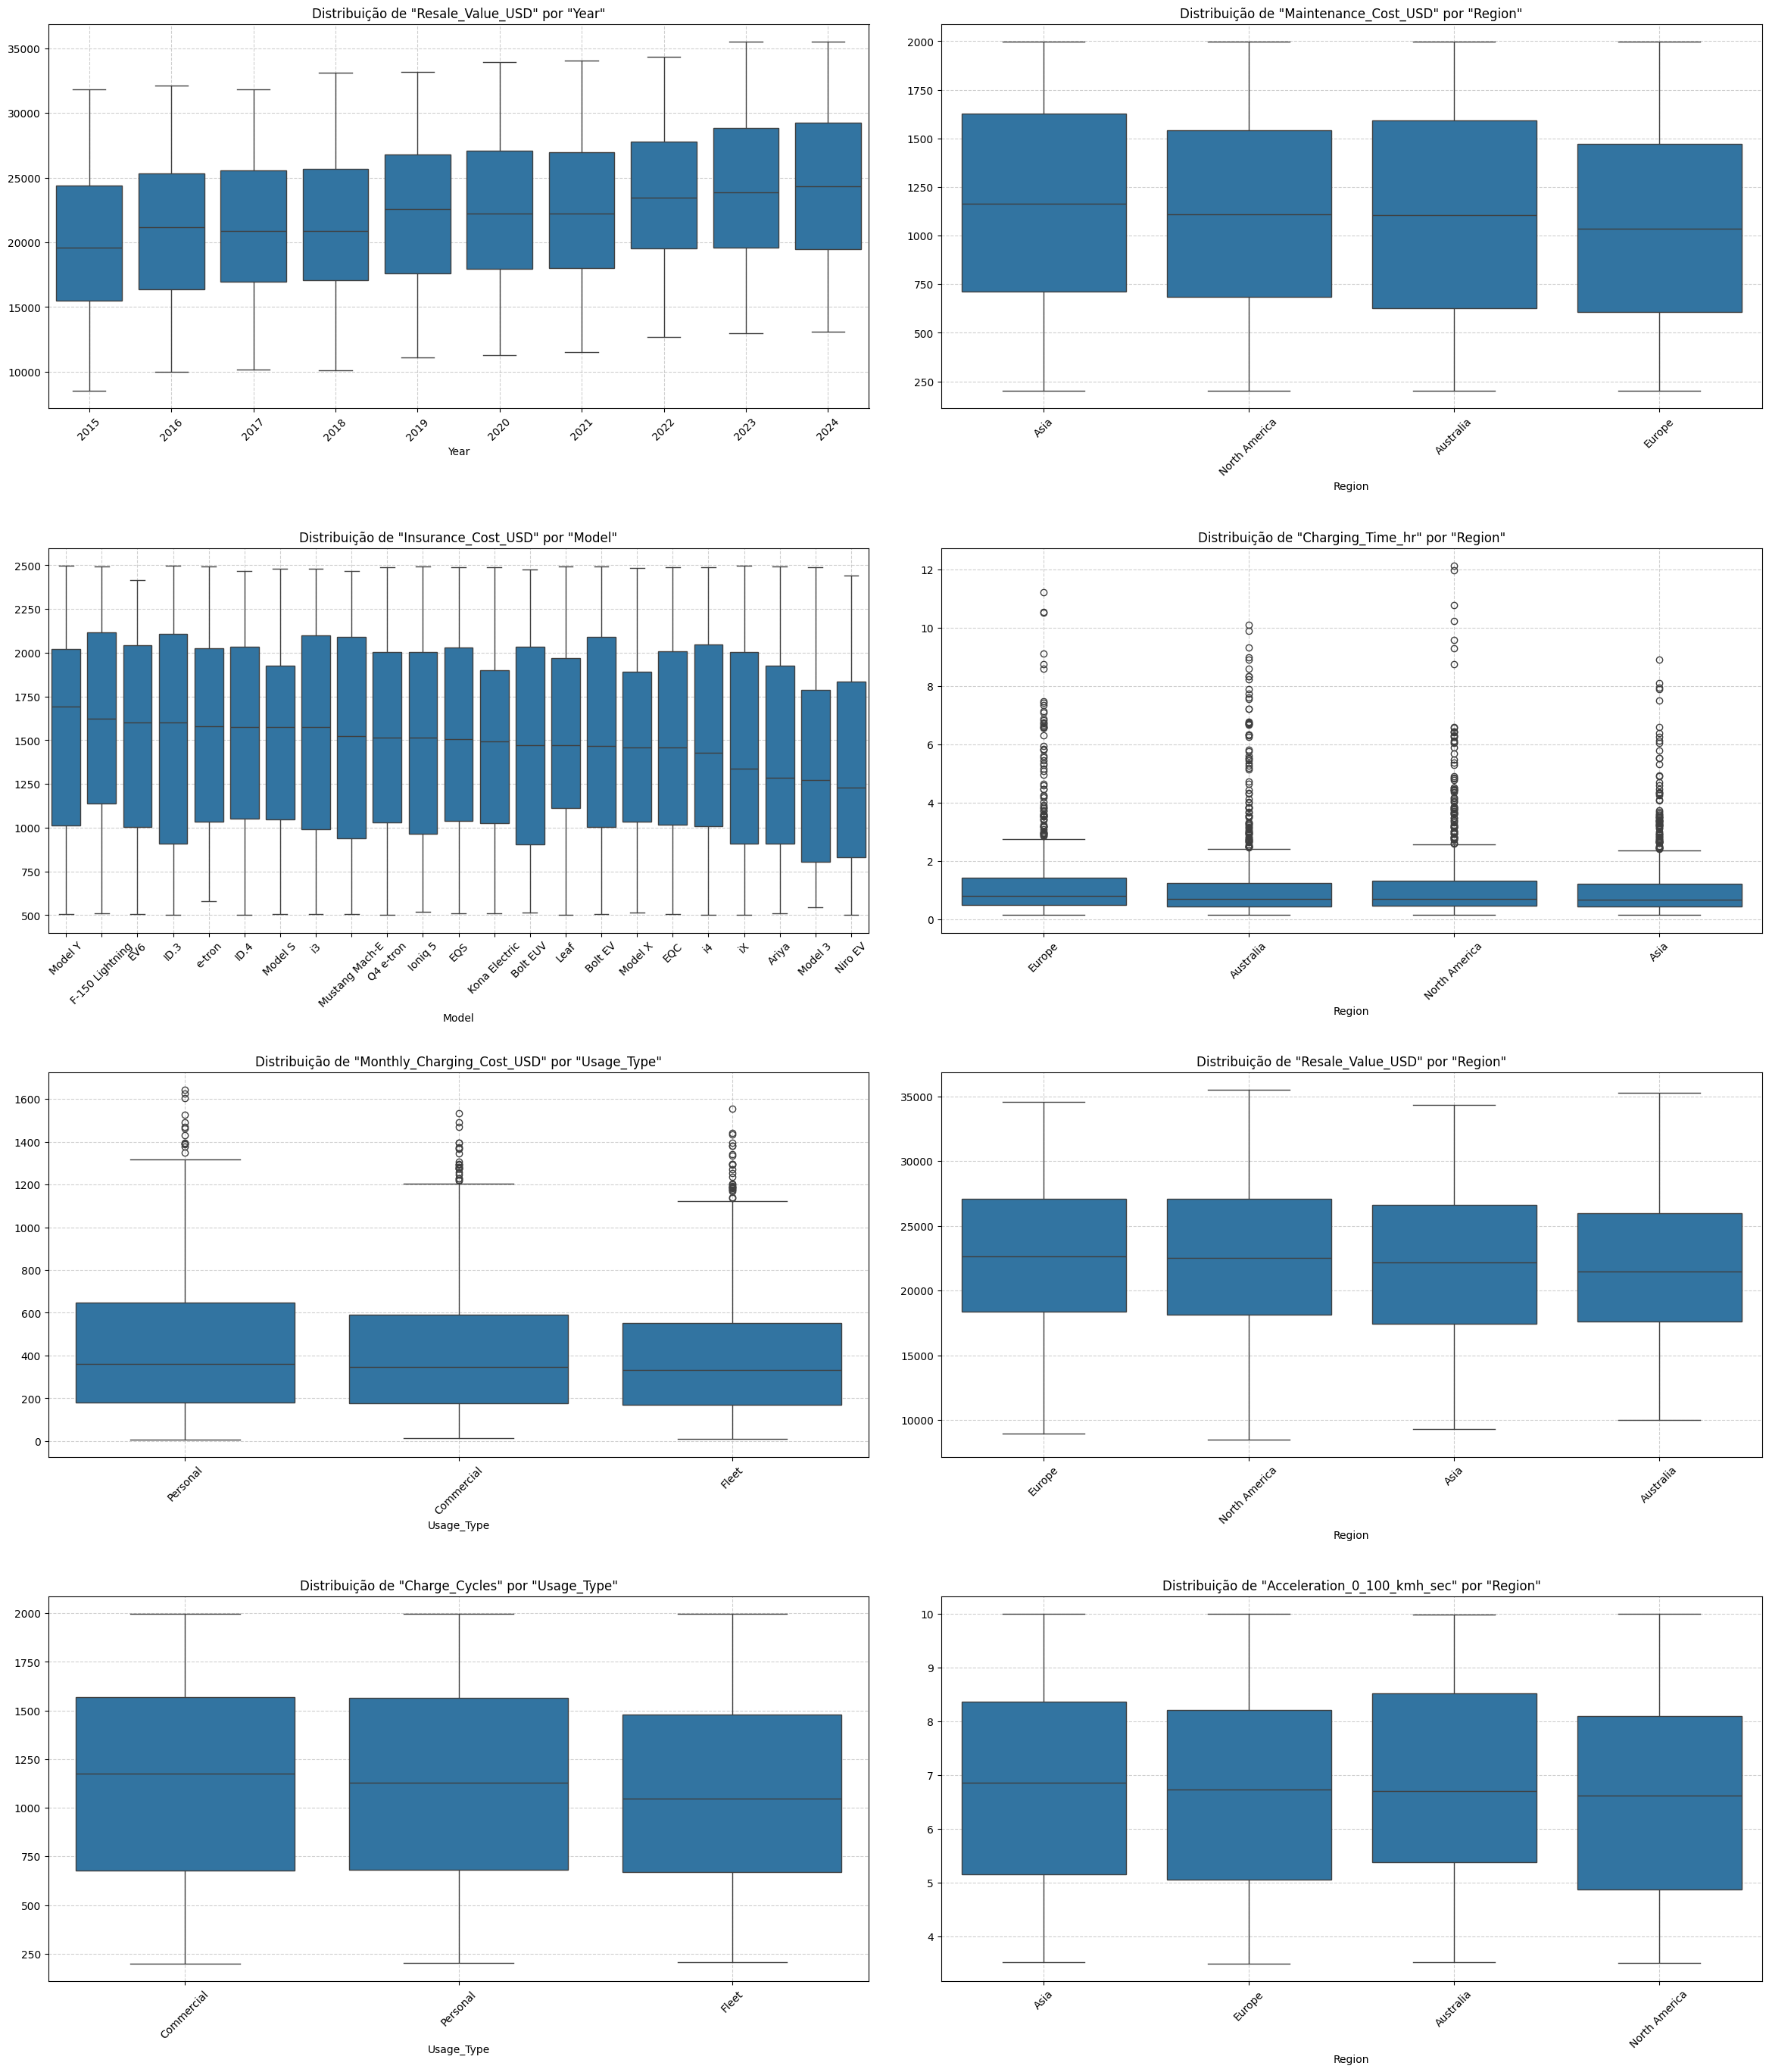

In [49]:
boxplot_anova(ev_df, list_features)

##### **Considerações**


**1 - `Year` vs `Resale_Value_USD`**
* Há uma clara e consistente tendência de alta. A linha mediana de cada caixa sobe progressivamente de `2015` para `2024`.
* A dispersão dos `Resale_Value_USD` parece relativamente estável

Hipóteses para Estudos
> O valor de revenda dos veículos elétricos decai a uma taxa relativamente previsível a cada ano. Desenvolver um modelo de regressão para quantificar a curva de depreciação e prever o valor de um veículo com base no seu ano-modelo.

---

**2 - `Maintenance_Cost_USD` vs `Region`**
* Enquanto `Ásia`, `América do Norte` e `Austrália` apresentam custos medianos de manutenção muito parecidos, a mediana para a `Europa` é visivelmente mais baixa.
* A variabilidade de preços para serviços de manutenção é semelhante em todos as `Region`

Hipóteses para Estudos
> O custo mediano de manutenção de VEs na Europa é menor devido a fatores econômicos locais?

---

**3 - `Insurance_Cost_USD` vs `Model`**
* Modelos de maior porte ou performance (como `F-150 Lightning`, `Model S`) apresentam custos medianos de seguro mais elevados, enquanto modelos mais econômicos (como `Niro EV`, `Model 3`) são consistentemente mais baratos.
* A variabilidade dos preços difere significativamente entre os modelos; alguns (como o `Bolt EV`) têm custos muito variáveis, enquanto outros (como o `Niro EV`) têm preços mais consistentes.

Implicações para Modelagem Preditiva
> A clara diferenciação de custos e variabilidade entre os modelos indica que a variável `Model` é um **forte preditor** para um modelo de machine learning que vise prever o `Insurance_Cost`.

---

**4 - `Charging_Time_hr` vs `Region`**
* A distribuição dos tempos de carregamento é bastante similar entre as quatro `Region`.
* As medianas e os intervalos interquartis são quase idênticos, indicando que o tempo de carregamento "típico" é consistentemente baixo em todos os continentes.
* Observa-se a presença de outliers em todas as `Region`.
* A maioria `Charging_Time_hr` é rápida, mas existe uma longa cauda de eventos muito demorados em todos os lugares.

Recomendação para Pré-processamento
> Devido à forte assimetria positiva observada na variável `Charging_Time_hr`, recomenda-se a aplicação de uma transformação matemática (tipicamente a logarítmica) para normalizar a distribuição.
---

**5 - `Monthly_Charging_Cost_USD` vs `Usage_Type`**
* O `Monthly_Charging_Cost_USD` para veículos de uso `Personal` é visivelmente **mais alto** do que para veículos de uso `Commercial` e `Fleet`, que apresentam medianas muito similares entre si e mais baixas.
* A dispersão dos custos (altura da caixa) é semelhante entre os três tipos de uso, e todos exibiem uma **forte assimetria positiva**, com numerosos outliers de custo elevado.

Hipóteses para Estudos
> A diferença no custo mediano sugere que os padrões de uso impactam os gastos com carregamento.
> Os veículos de uso pessoal tendem a rodar mais quilômetros por mês ou se têm menos acesso a tarifas de eletricidade mais baratas (como carregadores de frota/comerciais)?

---

**6 - `Resale_Value_USD` vs `Region`**
* O valor de revenda mediano é muito semelhante para Europa, América do Norte e Ásia. No entanto, a mediana para a `Austrália` **é inferior** em comparação com as demais `Region`.
* A dispersão dos valores é bastante consistente entre as quatro regiões, indicando uma variabilidade de preços similar nos diferentes mercados.

Hipóteses para Estudos
> A discrepância no valor de revenda na Austrália sugere a influência de fatores de mercado locais. Recomenda-se investigar se o mix de `Modelos` de veículos disponíveis na Austrália difere das outras regiões, ou se fatores econômicos como impostos, concorrência, temperatura ambiente ou preferências do consumidor no mercado australiano contribuem para uma depreciação mais acentuada.

---

**7 - `Charge_Cycles` vs `Usage_Type`**
* Existe uma diferença ordenada nas medianas dos ciclos de carga: veículos de uso `Personal` apresentam **a maior mediana**, seguidos por `Commercial` e, por último, `Fleet` com a menor mediana de ciclos.
* A dispersão é muito semelhante entre os três grupos, indicando que a variabilidade na quantidade de ciclos de carga é consistente, independentemente do tipo de uso.

Hipóteses para Estudos
> A hierarquia observada nos ciclos de carga sugere diferentes perfis de uso. Recomenda-se investigar se os veículos de uso `Personal` realizam trajetos mais curtos e frequentes, enquanto veículos de `Fleet` podem ter rotas mais otimizadas e horários de recarga planejados que resultam em menos ciclos para uma mesma quilometragem.

---

**8 - `Acceleration_0_100_kmh_sec` vs `Region`**
* As medianas do tempo de aceleração são **extremamente semelhantes** entre as quatro regiões. Embora a análise ANOVA tenha detectado uma diferença estatisticamente significativa, ela é visualmente quase imperceptível.
* A dispersão dos tempos de aceleração também é notavelmente consistente entre as regiões.

Nenhuma recomendação para análise futura.


